# __ADALINE(Adaptive Linear Neuron) Training Algorithm__
## _Demonstration using Fisher's Iris Dataset_

## Background and Motivation 

The ADALINE training algorithm is a fundamental classifier which improves upon the Perceptron algorithm. The ADALINE model deals with the limitations of the perceptron that prevent it from being effective on data that is not linearly seperable. The following demonstration will use Fisher's dataset on Iris flower measurements to show how the ADALINE model can be used for effective training based on linearly inseperable data. 

### Import dataset: 

In [183]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('iris.csv', header = None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Note:
<br>
Column 0: Sepal Length [cm] 
<br>
Column 1: Sepal Width [cm] 
<br>
Column 2: Petal Length [cm] 
<br>
Column 3: Petal Width [cm] 
<br>

### Identify two linearly inseperable classes: 

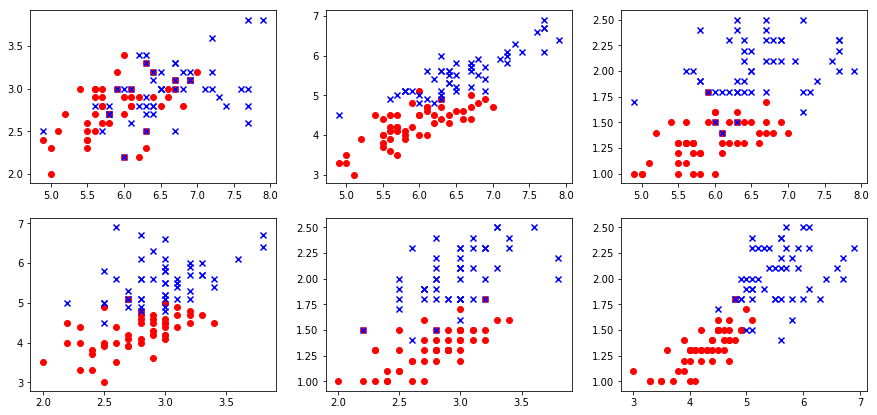

In [184]:
# consider 'Iris-versicolor' and 'Iris-verginica'

vrs_vrg = df.iloc[50:150, 4].values
vrs_vrg = np.where(vrs_vrg == 'Iris-versicolor', -1, 1)

# plot to check each combination of features for linear seperability

fig, plts = plt.subplots(nrows = 2, ncols = 3, figsize=(15,7))

plts[0,0].scatter(df.iloc[50:100,0], df.iloc[50:100,1], color = 'red', marker = 'o', label = 'versicolor')
plts[0,0].scatter(df.iloc[100:150,0], df.iloc[100:150,1], color = 'blue', marker = 'x', label = 'verginica')

plts[0,1].scatter(df.iloc[50:100,0], df.iloc[50:100,2], color = 'red', marker = 'o', label = 'versicolor')
plts[0,1].scatter(df.iloc[100:150,0], df.iloc[100:150,2], color = 'blue', marker = 'x', label = 'verginica')

plts[0,2].scatter(df.iloc[50:100,0], df.iloc[50:100,3], color = 'red', marker = 'o', label = 'versicolor')
plts[0,2].scatter(df.iloc[100:150,0], df.iloc[100:150,3], color = 'blue', marker = 'x', label = 'verginica')

plts[1,0].scatter(df.iloc[50:100,1], df.iloc[50:100,2], color = 'red', marker = 'o', label = 'versicolor')
plts[1,0].scatter(df.iloc[100:150,1], df.iloc[100:150,2], color = 'blue', marker = 'x', label = 'verginica')

plts[1,1].scatter(df.iloc[50:100,1], df.iloc[50:100,3], color = 'red', marker = 'o', label = 'versicolor')
plts[1,1].scatter(df.iloc[100:150,1], df.iloc[100:150,3], color = 'blue', marker = 'x', label = 'verginica')

plts[1,2].scatter(df.iloc[50:100,2], df.iloc[50:100,3], color = 'red', marker = 'o', label = 'versicolor')
plts[1,2].scatter(df.iloc[100:150,2], df.iloc[100:150,3], color = 'blue', marker = 'x', label = 'verginica')



As seen in the above figures, the Versicolor and Verginica flowers are a good choice for training with the Adaline model since each combination of two features used for analysis show linear inseperabiltiy, therefore, the perceptron model would fall short. The code below is an implementation of the Adaline training algorithm [Raschka & Mirjalili]

### Implementation of the Adaline algorithm

In [185]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

To demonstrate the effectiveness of the Adaline algorithm, 11 different cases will be trained: all six variations of two features at a time, all four cases of three features at a time, and the one case of using all the features at once. Upon training, the indicator of success is the convergence of the cost function which tracks how far the models prediction is from the known label. 

## Data Training

In [186]:
# We give each data set the property of a normal distribution to facilitate the faster minimization of the cost function.

def standardize(X):
    X_std = np.copy(X)
    for i in range(X.shape[1]):
        X_std[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
    return X_std

### Using two features: 

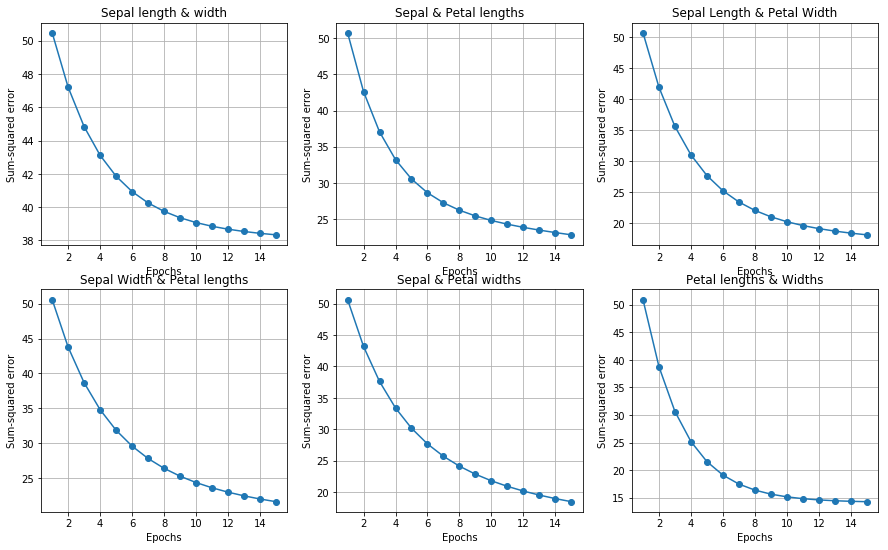

In [187]:
fig1, cost_conv = plt.subplots(nrows = 2, ncols = 3, figsize=(15,9))

# sepal length and sepal width 
X_sl_sw = standardize(df.iloc[50:150, [0,1]].values)
ada_sl_sw = AdalineGD(n_iter=15, eta=0.001)
ada_sl_sw.fit(X_sl_sw, vrs_vrg)

cost_conv[0,0].plot(range(1, len(ada_sl_sw.cost_) + 1), ada_sl_sw.cost_, marker='o')
cost_conv[0,0].set_xlabel('Epochs')
cost_conv[0,0].set_ylabel('Sum-squared error')
cost_conv[0,0].set_title('Sepal length & width')
cost_conv[0,0].grid()

X_sl_pl = standardize(df.iloc[50:150, [0,2]].values)
ada_sl_pl = AdalineGD(n_iter=15, eta=0.001)
ada_sl_pl.fit(X_sl_pl, vrs_vrg)

cost_conv[0,1].plot(range(1, len(ada_sl_pl.cost_) + 1), ada_sl_pl.cost_, marker='o')
cost_conv[0,1].set_xlabel('Epochs')
cost_conv[0,1].set_ylabel('Sum-squared error')
cost_conv[0,1].set_title('Sepal & Petal lengths')
cost_conv[0,1].grid()

X_sl_pw = standardize(df.iloc[50:150, [0,3]].values)
ada_sl_pw = AdalineGD(n_iter=15, eta=0.001)
ada_sl_pw.fit(X_sl_pw, vrs_vrg)

cost_conv[0,2].plot(range(1, len(ada_sl_pw.cost_) + 1), ada_sl_pw.cost_, marker='o')
cost_conv[0,2].set_xlabel('Epochs')
cost_conv[0,2].set_ylabel('Sum-squared error')
cost_conv[0,2].set_title('Sepal Length & Petal Width')
cost_conv[0,2].grid()

X_sw_pl = standardize(df.iloc[50:150, [1,2]].values)
ada_sw_pl = AdalineGD(n_iter=15, eta=0.001)
ada_sw_pl.fit(X_sw_pl, vrs_vrg)

cost_conv[1,0].plot(range(1, len(ada_sw_pl.cost_) + 1), ada_sw_pl.cost_, marker='o')
cost_conv[1,0].set_xlabel('Epochs')
cost_conv[1,0].set_ylabel('Sum-squared error')
cost_conv[1,0].set_title('Sepal Width & Petal lengths')
cost_conv[1,0].grid()

X_sw_pw = standardize(df.iloc[50:150, [1,3]].values)
ada_sw_pw = AdalineGD(n_iter=15, eta=0.001)
ada_sw_pw.fit(X_sw_pw, vrs_vrg)

cost_conv[1,1].plot(range(1, len(ada_sw_pw.cost_) + 1), ada_sw_pw.cost_, marker='o')
cost_conv[1,1].set_xlabel('Epochs')
cost_conv[1,1].set_ylabel('Sum-squared error')
cost_conv[1,1].set_title('Sepal & Petal widths')
cost_conv[1,1].grid()

X_pl_pw = standardize(df.iloc[50:150, [2,3]].values)
ada_pl_pw = AdalineGD(n_iter=15, eta=0.001)
ada_pl_pw.fit(X_pl_pw, vrs_vrg)

cost_conv[1,2].plot(range(1, len(ada_pl_pw.cost_) + 1), ada_pl_pw.cost_, marker='o')
cost_conv[1,2].set_xlabel('Epochs')
cost_conv[1,2].set_ylabel('Sum-squared error')
cost_conv[1,2].set_title('Petal lengths & Widths')
cost_conv[1,2].grid()

### Three features at a time

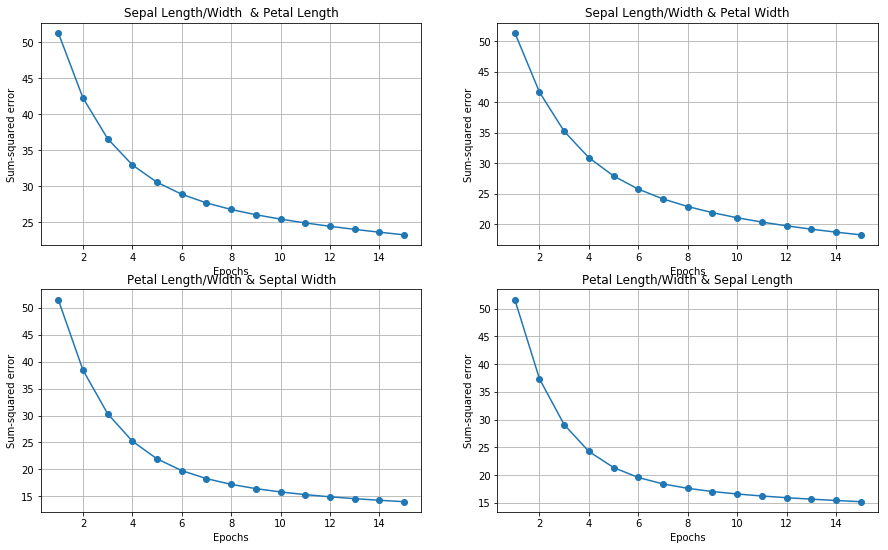

In [188]:
fig2, cost_conv3 = plt.subplots(nrows = 2, ncols = 2, figsize=(15,9))

X_slw_pl = standardize(df.iloc[50:150, [0,1,2]].values)
ada_slw_pl = AdalineGD(n_iter=15, eta=0.001)
ada_slw_pl.fit(X_slw_pl, vrs_vrg)

X_slw_pw = standardize(df.iloc[50:150, [0,1,3]].values)
ada_slw_pw = AdalineGD(n_iter=15, eta=0.001)
ada_slw_pw.fit(X_slw_pw, vrs_vrg)

X_plw_sw = standardize(df.iloc[50:150, [1,2,3]].values)
ada_plw_sw = AdalineGD(n_iter=15, eta=0.001)
ada_plw_sw.fit(X_plw_sw, vrs_vrg)

X_plw_sl = standardize(df.iloc[50:150, [0,2,3]].values)
ada_plw_sl = AdalineGD(n_iter=15, eta=0.001)
ada_plw_sl.fit(X_plw_sl, vrs_vrg)

cost_conv3[0,0].plot(range(1, len(ada_slw_pl.cost_) + 1), ada_slw_pl.cost_, marker='o')
cost_conv3[0,0].set_xlabel('Epochs')
cost_conv3[0,0].set_ylabel('Sum-squared error')
cost_conv3[0,0].set_title('Sepal Length/Width  & Petal Length')
cost_conv3[0,0].grid()

cost_conv3[0,1].plot(range(1, len(ada_slw_pw.cost_) + 1), ada_slw_pw.cost_, marker='o')
cost_conv3[0,1].set_xlabel('Epochs')
cost_conv3[0,1].set_ylabel('Sum-squared error')
cost_conv3[0,1].set_title('Sepal Length/Width & Petal Width')
cost_conv3[0,1].grid()

cost_conv3[1,0].plot(range(1, len(ada_plw_sw.cost_) + 1), ada_plw_sw.cost_, marker='o')
cost_conv3[1,0].set_xlabel('Epochs')
cost_conv3[1,0].set_ylabel('Sum-squared error')
cost_conv3[1,0].set_title('Petal Length/Width & Septal Width')
cost_conv3[1,0].grid()

cost_conv3[1,1].plot(range(1, len(ada_plw_sl.cost_) + 1), ada_plw_sl.cost_, marker='o')
cost_conv3[1,1].set_xlabel('Epochs')
cost_conv3[1,1].set_ylabel('Sum-squared error')
cost_conv3[1,1].set_title('Petal Length/Width & Sepal Length')
cost_conv3[1,1].grid()


### All features

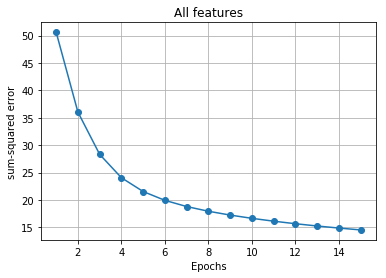

In [189]:
X_all = standardize(df.iloc[50:150, [0,1,2,3]].values)
ada_all = AdalineGD(n_iter = 15, eta = 0.001)
ada_all.fit(X_all, vrs_vrg)

plt.plot(range(1,len(ada_all.cost_)+1), ada_all.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared error')
plt.title('All features')
plt.grid()

## Analysis 

Upon analysis training using 15 iterations of the Adaline algorithm, we yield the following minimum sum-squared errors: 

In [190]:
print("Training using sepal length & width: " + str(ada_sl_sw.cost_[14]))
print("Training using sepal & petal length: " + str(ada_sl_pl.cost_[14]))
print("Training using sepal length & petal width: " + str(ada_sl_pw.cost_[14]))
print("Training using sepal width & petal length: " + str(ada_sw_pl.cost_[14]))
print("Training using sepal and petal width: " + str(ada_sw_pw.cost_[14]))
print("Training using petal length & width: " + str(ada_pl_pw.cost_[14]))
print("Training using sepal length/width & petal length: " + str(ada_slw_pl.cost_[14]))
print("Training using sepal length/width & petal width: " + str(ada_slw_pw.cost_[14]))
print("Training using petal length/width & sepal length: " + str(ada_plw_sl.cost_[14]))
print("Training using petal length/width & sepal width: " + str(ada_plw_sw.cost_[14]))
print("Training using all features: " + str(ada_all.cost_[14]))

Training using sepal length & width: 38.33818983172265
Training using sepal & petal length: 22.872218481737267
Training using sepal length & petal width: 18.070841517469418
Training using sepal width & petal length: 21.58210802060951
Training using sepal and petal width: 18.484281794173913
Training using petal length & width: 14.291966877284615
Training using sepal length/width & petal length: 23.224150093153973
Training using sepal length/width & petal width: 18.27203568888538
Training using petal length/width & sepal length: 15.204201803899226
Training using petal length/width & sepal width: 14.007737864480596
Training using all features: 14.551358999638769


## Conclusion

Using the Adaline training algorithm, we are able to overcome the limitation of the perceptron model which only allows us to work with linearly seperable classifiers. In the above demonstration, we were able to show that two linearly inseperable classes could be used to effectively train a learning algorithm. This was apparent in the converging shape of the graph of iterations against the sum-squared error for each training set. In addition, there is a trend showing the minimization of the cost function as we use more features. A final consideration for this algorithm is to note that the demonstration here used batch gradient descent which trains the model by summing the cost of each sample to compute the gradient. This can prove computationaly costly when used on large datasets, so an alternative approach would be to use stochastic gradient descent in the implementation of Adaline, where the cost gradient of one sample is used per iteration. 